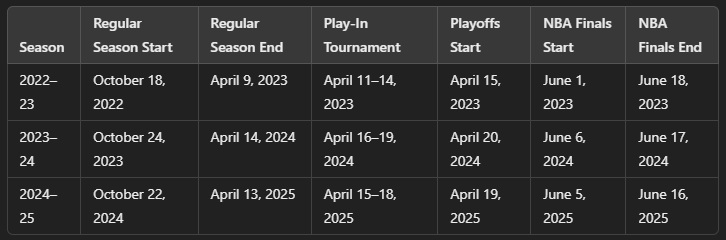

In [60]:
%load_ext autoreload
%autoreload 2

import os
import re
import sys
from datetime import datetime
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../"))

# Set display options
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)
pd.set_option("display.max_rows", 400)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
keep_cols = [
    "season_year",
    "game_date",
    "gameId",
    "matchup",
    # "teamId",
    # "teamCity",
    "teamName",
    # "teamTricode",
    "teamSlug",
    "personId",
    "personName",
    # "position",
    # "comment",
    # "jerseyNum",
    "minutes",
    "fieldGoalsMade",
    "fieldGoalsAttempted",
    "fieldGoalsPercentage",
    "threePointersMade",
    "threePointersAttempted",
    "threePointersPercentage",
    "freeThrowsMade",
    "freeThrowsAttempted",
    "freeThrowsPercentage",
    "reboundsOffensive",
    "reboundsDefensive",
    "reboundsTotal",
    "assists",
    "steals",
    "blocks",
    "turnovers",
    "foulsPersonal",
    "points",
    "plusMinusPoints",
    "fantasyPoints",
    "projectedFantasyPoints",
    "outperformed",
]

df = pd.read_parquet(
    "../data/processed/regular_season_box_scores.pq", columns=keep_cols
)

keep_seasons = ["2021-22", "2022-23", "2023-24"]
df = df[df.season_year.isin(keep_seasons)]

In [62]:
# Compute average minutes per game
# Compute number of games played over 5 minutes

result = (
    df.groupby(["season_year", "personId", "personName"])
    .agg(
        avg_minutes_per_game=("minutes", "mean"),
        games_over_5_minutes=("minutes", lambda x: (x > 5).sum()),
        total_games=("gameId", "nunique"),
    )
    .reset_index()
)

result

,season_year,personId,personName,avg_minutes_per_game,games_over_5_minutes,total_games
0,2021-22,2207,Joe Johnson,0.390000,0,5
1,2021-22,2544,LeBron James,34.739444,56,60
2,2021-22,2546,Carmelo Anthony,25.617619,69,70
3,2021-22,2617,Udonis Haslem,1.094956,8,76
4,2021-22,2730,Dwight Howard,12.606926,58,77
...,...,...,...,...,...,...
1747,2023-24,1641936,Miles Norris,0.000000,0,1
1748,2023-24,1641945,Jaylin Galloway,0.000000,0,3
1749,2023-24,1641970,Maozinha Pereira,13.514815,6,9
1750,2023-24,1641998,Trey Jemison,19.132778,23,30


In [35]:
result.sort_values("avg_minutes_per_game", ascending=False).head(20)

,season_year,personId,personName,avg_minutes_per_game,games_over_5_minutes,total_games
524,2021-22,1630285,Zavier Simpson,43.520833,4,4
1162,2022-23,1631367,Jacob Gilyard,40.783333,1,1
297,2021-22,1628982,Melvin Frazier Jr.,39.855556,3,3
215,2021-22,1627783,Pascal Siakam,37.909559,68,68
65,2021-22,202681,Kyrie Irving,37.639080,29,29
1393,2023-24,1629029,Luka Doncic,37.486667,70,70
1187,2023-24,201942,DeMar DeRozan,37.357500,79,80
786,2022-23,1627783,Pascal Siakam,37.352817,71,71
17,2021-22,201142,Kevin Durant,37.225455,55,55
802,2022-23,1628369,Jayson Tatum,36.921622,74,74


In [30]:
result[result.personId == 2544]

,season_year,personId,personName,avg_minutes_per_game,games_over_5_minutes,total_games
1,2021-22,2544,LeBron James,34.739444,56,60
619,2022-23,2544,LeBron James,34.279532,55,57
1166,2023-24,2544,LeBron James,34.297945,71,73


In [36]:
result[result.personId == 1628369]

,season_year,personId,personName,avg_minutes_per_game,games_over_5_minutes,total_games
240,2021-22,1628369,Jayson Tatum,35.933991,76,76
802,2022-23,1628369,Jayson Tatum,36.921622,74,74
1319,2023-24,1628369,Jayson Tatum,35.270000,74,75


In [26]:
df[(df.season_year == "2022-23") & (df.personId == 2544) & (df.minutes < 5)]

,season_year,game_date,gameId,matchup,teamName,teamSlug,personId,personName,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed
109823,2022-23,2022-11-18,22200234,LAL vs. DET,Lakers,lakers,2544,LeBron James,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,45.95,False
125061,2022-23,2023-02-09,22200834,LAL vs. MIL,Lakers,lakers,2544,LeBron James,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,53.90,False


## Baseline XG Boost Model

In [46]:
from sklearn.model_selection import train_test_split
from src.model_xg import add_lagged_features
from xgboost import XGBRegressor

lag_features = [
    "minutes",
    "fieldGoalsAttempted",
    "fieldGoalsPercentage",
    "threePointersAttempted",
    "threePointersPercentage",
    "freeThrowsAttempted",
    "freeThrowsPercentage",
    "reboundsDefensive",
    "reboundsTotal",
    "assists",
    "steals",
    "blocks",
    "turnovers",
    "foulsPersonal",
    "points",
]

df_xg, new_feats = add_lagged_features(df, lag_features, 5)
df_xg = df_xg.dropna()

# ---- Create train/test dataset ----
select_features = ["plusMinusPoints"] + new_feats
target_col = "fantasyPoints"

train_size = int(len(df) * 0.8)
train_df = df_xg.iloc[train_size:]
test_df = df_xg.iloc[:train_size]

X_train, X_test = train_df[select_features], test_df[select_features]
y_train, y_test = train_df[target_col], test_df[target_col]

# ---- Train XGBoost model ----
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ---- Evaluate the model ----
y_pred = model.predict(X_test)

display(df_xg)

# 5-day moving average performance
print(
    "Sliding Window MAE:", np.mean(np.abs(y_test - test_df["projectedFantasyPoints"]))
)
print("Model MAE:", np.mean(np.abs(y_test - y_pred)))

,season_year,game_date,gameId,matchup,teamName,teamSlug,personId,personName,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed,minutes_lag_1,minutes_lag_2,minutes_lag_3,minutes_lag_4,minutes_lag_5,fieldGoalsAttempted_lag_1,fieldGoalsAttempted_lag_2,fieldGoalsAttempted_lag_3,fieldGoalsAttempted_lag_4,fieldGoalsAttempted_lag_5,fieldGoalsPercentage_lag_1,fieldGoalsPercentage_lag_2,fieldGoalsPercentage_lag_3,fieldGoalsPercentage_lag_4,fieldGoalsPercentage_lag_5,threePointersAttempted_lag_1,threePointersAttempted_lag_2,threePointersAttempted_lag_3,threePointersAttempted_lag_4,...,freeThrowsAttempted_lag_1,freeThrowsAttempted_lag_2,freeThrowsAttempted_lag_3,freeThrowsAttempted_lag_4,freeThrowsAttempted_lag_5,freeThrowsPercentage_lag_1,freeThrowsPercentage_lag_2,freeThrowsPercentage_lag_3,freeThrowsPercentage_lag_4,freeThrowsPercentage_lag_5,reboundsDefensive_lag_1,reboundsDefensive_lag_2,reboundsDefensive_lag_3,reboundsDefensive_lag_4,reboundsDefensive_lag_5,reboundsTotal_lag_1,reboundsTotal_lag_2,reboundsTotal_lag_3,reboundsTotal_lag_4,reboundsTotal_lag_5,assists_lag_1,assists_lag_2,assists_lag_3,assists_lag_4,assists_lag_5,steals_lag_1,steals_lag_2,steals_lag_3,steals_lag_4,steals_lag_5,blocks_lag_1,blocks_lag_2,blocks_lag_3,blocks_lag_4,blocks_lag_5,turnovers_lag_1,turnovers_lag_2,turnovers_lag_3,turnovers_lag_4,turnovers_lag_5,foulsPersonal_lag_1,foulsPersonal_lag_2,foulsPersonal_lag_3,foulsPersonal_lag_4,foulsPersonal_lag_5,points_lag_1,points_lag_2,points_lag_3,points_lag_4,points_lag_5
74362,2021-22,2021-10-29,22100071,ORL @ TOR,Magic,magic,201577,Robin Lopez,7.483333,0,1,0.000,0,0,0.000,0,0,0.0,0,0,0,1,0,1,1,2,0,-10,3.00,8.20,False,0.000000,10.550000,14.666667,13.166667,13.150000,0.0,5.0,0.0,3.0,4.0,0.000,0.800,0.000,0.667,0.500,0.0,0.0,0.0,0.0,...,0.0,5.0,2.0,1.0,0.0,0.00,0.6,1.000,1.0,0.000,0.0,0.0,4.0,3.0,0.0,0.0,1.0,4.0,4.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,11.0,2.0,5.0,4.0
74363,2021-22,2021-10-29,22100071,TOR vs. ORL,Raptors,raptors,201609,Goran Dragic,0.000000,0,0,0.000,0,0,0.000,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.00,10.35,False,0.000000,13.783333,14.466667,11.666667,21.650000,0.0,6.0,3.0,6.0,7.0,0.000,0.167,0.333,0.333,0.429,0.0,3.0,0.0,4.0,...,0.0,6.0,0.0,0.0,2.0,0.00,1.0,0.000,0.0,1.000,0.0,3.0,2.0,1.0,3.0,0.0,3.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,8.0,2.0,5.0,9.0
74364,2021-22,2021-10-29,22100071,ORL @ TOR,Magic,magic,203082,Terrence Ross,21.516667,4,7,0.571,1,4,0.250,0,1,0.0,0,3,3,1,0,0,0,2,9,-13,14.25,17.10,False,29.500000,21.516667,31.283333,24.083333,27.350000,15.0,7.0,11.0,8.0,10.0,0.467,0.000,0.545,0.500,0.500,8.0,6.0,6.0,7.0,...,0.0,0.0,9.0,1.0,4.0,0.00,0.0,0.889,0.0,1.000,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,3.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,18.0,0.0,22.0,12.0,15.0
74365,2021-22,2021-10-29,22100071,ORL @ TOR,Magic,magic,203914,Gary Harris,26.500000,5,11,0.455,1,3,0.333,0,0,0.0,1,0,1,3,0,0,1,1,11,-16,16.25,3.00,True,22.633333,18.933333,0.000000,0.000000,0.000000,6.0,3.0,0.0,0.0,0.0,0.500,0.333,0.000,0.000,0.000,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.00,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,8.0,2.0,0.0,0.0,0.0
74366,2021-22,2021-10-29,22100071,TOR vs. ORL,Raptors,raptors,203920,Khem Birch,23.233333,1,3,0.333,0,1,0.000,4,5,0.8,3,3,6,3,1,0,1,3,6,15,19.50,14.70,True,19.600000,18.483333,17.650000,20.866667,26.016667,5.0,7.0,2.0,3.0,4.0,0.400,0.714,0.500,0.333,0.500,0.0,0.0,1.0,

Sliding Window MAE: 7.408899183705608
Model MAE: 6.407464601777956


### Analyze Results

,season_year,game_date,gameId,matchup,teamName,teamSlug,personId,personName,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed,xg_predict,xg_outperform
74362,2021-22,2021-10-29,22100071,ORL @ TOR,Magic,magic,201577,Robin Lopez,7.483333,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,1,0,1,1,2,0,-10,3.00,8.20,False,8.589180,True
74363,2021-22,2021-10-29,22100071,TOR vs. ORL,Raptors,raptors,201609,Goran Dragic,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,10.35,False,1.397618,False
74364,2021-22,2021-10-29,22100071,ORL @ TOR,Magic,magic,203082,Terrence Ross,21.516667,4,7,0.571,1,4,0.250,0,1,0.000,0,3,3,1,0,0,0,2,9,-13,14.25,17.10,False,18.562593,True
74365,2021-22,2021-10-29,22100071,ORL @ TOR,Magic,magic,203914,Gary Harris,26.500000,5,11,0.455,1,3,0.333,0,0,0.000,1,0,1,3,0,0,1,1,11,-16,16.25,3.00,True,12.179602,True
74366,2021-22,2021-10-29,22100071,TOR vs. ORL,Raptors,raptors,203920,Khem Birch,23.233333,1,3,0.333,0,1,0.000,4,5,0.800,3,3,6,3,1,0,1,3,6,15,19.50,14.70,True,21.475723,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152578,2023-24,2024-01-24,22300624,CLE @ MIL,Cavaliers,cavaliers,1641854,Craig Porter Jr.,1.383333,0,0,0.000,0,0,0.000,2,2,1.000,0,0,0,0,0,0,0,0,2,5,2.00,10.00,False,18.002586,True
152579,2023-24,2024-01-24,22300625,PHX @ DAL,Suns,suns,201142,Kevin Durant,37.650000,4,10,0.400,0,4,0.000,4,7,0.571,0,10,10,7,1,2,1,4,12,19,42.00,48.90,False,45.564728,False
152580,2023-24,2024-01-24,22300625,DAL vs. PHX,Mavericks,mavericks,202693,Markieff Morris,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.40,False,0.079572,False
152581,2023-24,2024-01-24,22300625,PHX @ DAL,Suns,suns,203078,Bradley Beal,36.166667,8,15,0.533,3,7,0.429,1,2,0.500,2,5,7,7,1,1,2,4,20,9,42.25,32.00,True,35.716751,True


AUC: 0.6715749273331431


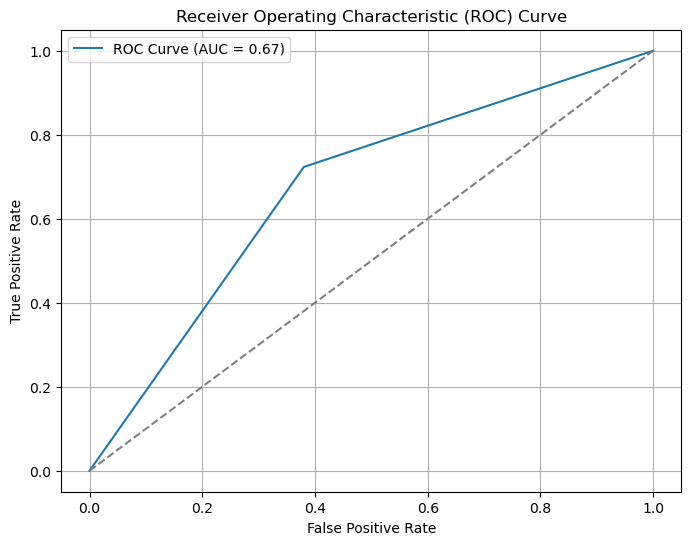

,Feature,Importance
1,minutes_lag_1,0.215742
6,fieldGoalsAttempted_lag_1,0.115114
2,minutes_lag_2,0.047372
3,minutes_lag_3,0.045976
7,fieldGoalsAttempted_lag_2,0.043755
10,fieldGoalsAttempted_lag_5,0.031079
9,fieldGoalsAttempted_lag_4,0.029293
0,plusMinusPoints,0.021443
4,minutes_lag_4,0.020545
72,points_lag_2,0.020214


In [47]:
from src.utils import compute_auc_roc

pattern = r".*_lag_\d+"
columns_to_drop = [col for col in df_xg.columns if re.match(pattern, col)]

results = test_df.drop(columns=columns_to_drop)
results = results.assign(xg_predict=y_pred)
results = results.assign(
    xg_outperform=results["xg_predict"] > results["projectedFantasyPoints"]
)

display(results)


true_labels = results["outperformed"]
predicted_labels = results["xg_outperform"]
auc = compute_auc_roc(true_labels, predicted_labels)

# ---- Extract feature importance scores ----
feature_importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)


display(importance_df.head(20))

## LSTM

In [93]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dfl = df.copy()

# Prepare the data
dfl = dfl.sort_values(
    by=["personId", "game_date"]
)  # Ensure chronological order for sequences

# Normalize the data
scaler = MinMaxScaler()
features = [
    "plusMinusPoints",
    "minutes",
    "fieldGoalsAttempted",
    "fieldGoalsPercentage",
    "threePointersAttempted",
    "threePointersPercentage",
    "freeThrowsAttempted",
    "freeThrowsPercentage",
    "reboundsDefensive",
    "reboundsTotal",
    "assists",
    "steals",
    "blocks",
    "turnovers",
    "foulsPersonal",
    "points",
]
target_col = "fantasyPoints"

dfl[features + [target_col]] = scaler.fit_transform(dfl[features + [target_col]])

In [94]:
# Function to create sequences
def create_sequences(df, features, target_col, lookback=5):
    sequences = []
    targets = []
    player_ids = df["personId"].unique()

    for player_id in player_ids:
        player_data = df[df["personId"] == player_id]
        feature_data = player_data[features].values
        target_data = player_data[target_col].values

        for i in range(len(feature_data) - lookback):
            seq = feature_data[i : i + lookback]
            target = target_data[i + lookback]
            sequences.append(seq)
            targets.append(target)

    return np.array(sequences), np.array(targets)


# Prepare sequences with adjusted indices
def create_sequences_with_indices(df, features, target_col, lookback=5):
    sequences = []
    targets = []
    indices = []
    player_ids = df["personId"].unique()

    for player_id in player_ids:
        player_data = df[df["personId"] == player_id].reset_index(drop=True)
        feature_data = player_data[features].values
        target_data = player_data[target_col].values

        for i in range(len(feature_data) - lookback):
            seq = feature_data[i : i + lookback]
            target = target_data[i + lookback]
            sequences.append(seq)
            targets.append(target)
            indices.append(player_data.loc[i + lookback, "adjusted_index"])

    return np.array(sequences), np.array(targets), indices


train_size = int(len(dfl) * 0.8)
train_df = dfl.iloc[train_size:]
test_df = dfl.iloc[:train_size]


# Add an index column to test_df for alignment
train_df = train_df.reset_index(drop=True)
train_df["adjusted_index"] = train_df.groupby("personId").cumcount()

# Add an index column to test_df for alignment
test_df = test_df.reset_index(drop=True)
test_df["adjusted_index"] = test_df.groupby("personId").cumcount()

# Create sequences with adjusted indices for test data
X_train, y_train, _ = create_sequences_with_indices(
    train_df, features, target_col, lookback
)
X_test, y_test, test_indices = create_sequences_with_indices(
    test_df, features, target_col, lookback
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [95]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass through LSTM layer
        lstm_out, _ = self.lstm(x)
        # Use the last hidden state for prediction
        out = self.fc(lstm_out[:, -1, :])
        return out


# Model parameters
input_size = len(features)  # Number of features
hidden_size = 50  # Number of LSTM hidden units
output_size = 1  # Regression target

model = LSTMModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 20
batch_size = 32

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i : i + batch_size]
        y_batch = y_train[i : i + batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(X_train):.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test).squeeze()
    test_loss = criterion(y_pred, y_test).item()
    print(f"Test Loss (MSE): {test_loss:.4f}")
    print(f"Test MAE: {torch.mean(torch.abs(y_pred - y_test)).item():.4f}")

Epoch 1/20, Loss: 0.0002
Epoch 2/20, Loss: 0.0002
Epoch 3/20, Loss: 0.0002
Epoch 4/20, Loss: 0.0002
Epoch 5/20, Loss: 0.0002
Epoch 6/20, Loss: 0.0002
Epoch 7/20, Loss: 0.0002
Epoch 8/20, Loss: 0.0002
Epoch 9/20, Loss: 0.0002
Epoch 10/20, Loss: 0.0002
Epoch 11/20, Loss: 0.0002
Epoch 12/20, Loss: 0.0002
Epoch 13/20, Loss: 0.0002
Epoch 14/20, Loss: 0.0002
Epoch 15/20, Loss: 0.0002
Epoch 16/20, Loss: 0.0002
Epoch 17/20, Loss: 0.0002
Epoch 18/20, Loss: 0.0002
Epoch 19/20, Loss: 0.0002
Epoch 20/20, Loss: 0.0002
Test Loss (MSE): 0.0084
Test MAE: 0.0687


In [70]:
y_pred.shape

torch.Size([72594])

In [71]:
len(y_test)

72594

In [73]:
len(test_indices)

72594

In [72]:
len(test_df)

76198

In [84]:
pd.Series(y_pred.numpy(), name="predicted", index=test_indices)

5      2.010737
6      1.836281
7      1.836281
8      1.836281
9      1.836281
        ...    
12    11.615267
13     9.560844
5     16.182114
6     20.251835
7     20.226124
Name: predicted, Length: 72594, dtype: float32

In [96]:
test_df_with_predictions = test_df.merge(
    pd.Series(y_pred.numpy(), name="predicted", index=test_indices), left_index=True, right_index=True, how="inner"
)

In [97]:
test_df_with_predictions

,season_year,game_date,gameId,matchup,teamName,teamSlug,personId,personName,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed,adjusted_index,predicted
5,2021-22,2021-10-19,22100002,LAL vs. GSW,Lakers,lakers,2544,LeBron James,0.650251,13,0.489362,0.565,5,0.478261,0.455,3,0.1875,0.5,1,0.476190,0.354839,0.217391,0.125,0.1,0.333333,0.833333,0.465753,0.509091,0.541573,34.80,True,0,0.127458
5,2021-22,2021-10-19,22100002,LAL vs. GSW,Lakers,lakers,2544,LeBron James,0.650251,13,0.489362,0.565,5,0.478261,0.455,3,0.1875,0.5,1,0.476190,0.354839,0.217391,0.125,0.1,0.333333,0.833333,0.465753,0.509091,0.541573,34.80,True,0,0.188116
5,2021-22,2021-10-19,22100002,LAL vs. GSW,Lakers,lakers,2544,LeBron James,0.650251,13,0.489362,0.565,5,0.478261,0.455,3,0.1875,0.5,1,0.476190,0.354839,0.217391,0.125,0.1,0.333333,0.833333,0.465753,0.509091,0.541573,34.80,True,0,0.031194
5,2021-22,2021-10-19,22100002,LAL vs. GSW,Lakers,lakers,2544,LeBron James,0.650251,13,0.489362,0.565,5,0.478261,0.455,3,0.1875,0.5,1,0.476190,0.354839,0.217391,0.125,0.1,0.333333,0.833333,0.465753,0.509091,0.541573,34.80,True,0,0.126494
5,2021-22,2021-10-19,22100002,LAL vs. GSW,Lakers,lakers,2544,LeBron James,0.650251,13,0.489362,0.565,5,0.478261,0.455,3,0.1875,0.5,1,0.476190,0.354839,0.217391,0.125,0.1,0.333333,0.833333,0.465753,0.509091,0.541573,34.80,True,0,0.151518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2021-22,2022-02-03,22100786,LAL @ LAC,Lakers,lakers,2546,Carmelo Anthony,0.196697,2,0.085106,0.500,2,0.130435,0.667,1,0.0625,0.5,0,0.095238,0.064516,0.000000,0.000,0.1,0.166667,0.000000,0.095890,0.527273,0.107865,27.35,False,49,0.127405
244,2021-22,2022-02-03,22100786,LAL @ LAC,Lakers,lakers,2546,Carmelo Anthony,0.196697,2,0.085106,0.500,2,0.130435,0.667,1,0.0625,0.5,0,0.095238,0.064516,0.000000,0.000,0.1,0.166667,0.000000,0.095890,0.527273,0.107865,27.35,False,49,0.196004
245,2021-22,2022-02-25,22100904,LAL vs. LAC,Lakers,lakers,2546,Carmelo Anthony,0.502212,7,0.297872,0.500,4,0.391304,0.444,0,0.0000,0.0,2,0.142857,0.161290,0.043478,0.250,0.1,0.083333,0.500000,0.246575,0.500000,0.294382,24.80,True,50,0.121914
245,2021-22,2022-02-25,22100904,LAL vs. LAC,Lakers,lakers,2546,Carmelo Anthony,0.502212,7,0.297872,0.500,4,0.391304,0.444,0,0.0000,0.0,2,0.142857,0.161290,0.043478,0.250,0.1,0.083333,0.500000,0.246575,0.500000,0.294382,24.80,True,50,0.176140


In [ ]:
# filter inactive players out

# Add lagged features

# Add matchups

# Add injury

# fit xgboost model

In [ ]:
---

## Misc

In [75]:
df

,index,game_date,gameId,matchup,teamId,teamName,personId,personName,minutes,points,reboundsTotal,assists,steals,blocks,turnovers,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed
0,0,2023-01-01,22200547,SAC @ MEM,1610612758,Kings,203084,Harrison Barnes,28.533333,16,5,1,1,0,2,-2,24.75,NaN,False
1,1,2023-01-01,22200547,SAC @ MEM,1610612758,Kings,203458,Alex Len,1.433333,0,0,1,0,0,1,2,1.00,NaN,False
2,2,2023-01-01,22200547,MEM vs. SAC,1610612763,Grizzlies,203500,Steven Adams,34.483333,11,23,3,1,2,4,4,49.75,NaN,False
3,3,2023-01-01,22200547,SAC @ MEM,1610612758,Kings,203521,Matthew Dellavedova,1.433333,0,0,0,0,0,0,2,0.00,NaN,False
4,4,2023-01-01,22200547,MEM vs. SAC,1610612763,Grizzlies,1626145,Tyus Jones,32.316667,18,6,8,1,0,0,14,39.50,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49947,49947,2024-04-14,22301200,POR @ SAC,1610612757,Trail Blazers,1631386,Taze Moore,30.150000,12,8,4,1,0,2,-27,29.00,1.00,True
49948,49948,2024-04-14,22301200,POR @ SAC,1610612757,Trail Blazers,1641712,Rayan Rupert,40.266667,11,6,5,0,0,2,-25,25.00,15.80,True
49949,49949,2024-04-14,22301200,SAC vs. POR,1610612758,Kings,1641732,Colby Jones,4.283333,8,1,1,0,1,0,1,12.75,7.70,True
49950,49950,2024-04-14,22301200,SAC vs. POR,1610612758,Kings,1641771,Jalen Slawson,3.633333,2,0,0,0,0,0,5,2.00,0.00,True


In [76]:
pd.set_option("display.max_rows", 400)
pdf = df[df.personId.isin([1641771])].sort_values(
    ["game_date", "gameId", "personId"]
)  # .head(20)
# pdf = df[df.personId.isin([2544, 203084, 203458, 203500])].sort_values(['game_date', 'gameId', 'personId'])#.head(20)
pdf.sort_values(["personId", "game_date", "gameId"])

,index,game_date,gameId,matchup,teamId,teamName,personId,personName,minutes,points,reboundsTotal,assists,steals,blocks,turnovers,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed
18336,18336,2023-10-27,22300087,SAC vs. GSW,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,NaN,False
18697,18697,2023-10-29,22300100,SAC vs. LAL,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,0.00,False
19407,19407,2023-11-01,22300126,SAC @ GSW,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,0.00,False
22018,22018,2023-11-15,22300198,SAC @ LAL,1610612758,Kings,1641771,Jalen Slawson,0.200000,0,0,0,0,0,0,0,0.00,0.00,False
22257,22257,2023-11-17,22300032,SAC @ SAS,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,0.00,False
22678,22678,2023-11-19,22300212,SAC @ DAL,1610612758,Kings,1641771,Jalen Slawson,3.933333,0,1,0,0,0,0,-3,1.25,0.00,True
22944,22944,2023-11-20,22300222,SAC @ NOP,1610612758,Kings,1641771,Jalen Slawson,12.000000,4,3,2,0,1,1,-5,12.25,0.25,True
23360,23360,2023-11-22,22300233,SAC @ NOP,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,2.70,False
23706,23706,2023-11-24,22300050,SAC @ MIN,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,2.70,False
24470,24470,2023-11-28,22300060,SAC vs. GSW,1610612758,Kings,1641771,Jalen Slawson,0.000000,0,0,0,0,0,0,0,0.00,2.70,False


In [128]:
pdf.groupby("personId")["fantasyPoints"].rolling(
    window=5, min_periods=1
).mean().reset_index(level=0, drop=True).shift(1)

77270        NaN
77128    24.7500
77404    29.6250
77170    29.7500
77357    28.3125
77407    29.1000
77122    28.2500
77423    29.7000
77258    30.9000
77092    32.0000
77272    28.6500
77208    31.2500
77484    28.2000
77218    23.6500
77269    21.6000
77109    22.4000
77259    20.5000
77229    21.9500
77136    21.7000
77220    21.8000
Name: fantasyPoints, dtype: float64

In [91]:
df.groupby("personId")["fantasyPoints"].rolling(
    window=5, min_periods=1
).mean().reset_index(level=0, drop=True)

43352     67.750000
43302     57.750000
43408     57.666667
43215     58.625000
43512     59.700000
            ...    
113010     5.916667
113013     9.250000
113012    13.300000
113008    11.550000
113011    13.350000
Name: fantasyPoints, Length: 49952, dtype: float64

In [100]:
d = (
    df.groupby("personId")["fantasyPoints"]
    .rolling(window=5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
    .shift(-1)
    .reset_index(drop=True)
)
d

0        57.750000
1        57.666667
2        58.625000
3        59.700000
4        60.450000
           ...    
49947     9.250000
49948    13.300000
49949    11.550000
49950    13.350000
49951          NaN
Name: fantasyPoints, Length: 49952, dtype: float64

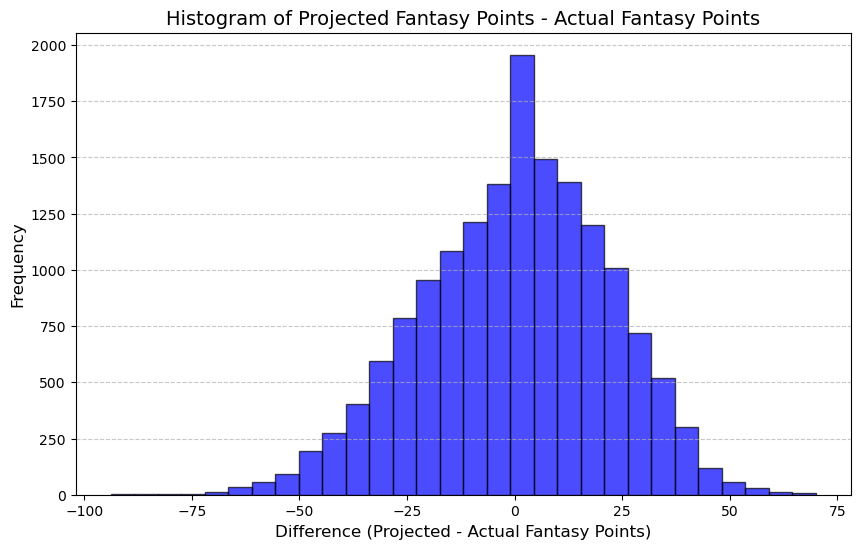

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(
    df["projectedFantasyPoints"] - df["fantasyPoints"],
    bins=30,
    alpha=0.7,
    color="blue",
    edgecolor="black",
)
plt.title("Histogram of Projected Fantasy Points - Actual Fantasy Points", fontsize=14)
plt.xlabel("Difference (Projected - Actual Fantasy Points)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [108]:
df[df.personName == "LeBron James"].sort_values("game_date")

,game_date,gameId,matchup,teamId,teamName,personId,personName,position,comment,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,fantasyPoints,projectedFantasyPoints,outperformed
43352,2023-01-02,22200551,LAL @ CHA,1610612747,Lakers,2544,LeBron James,F,NaN,39.566667,16,26,0.615,0,5,0.000,11,15,0.733,0,11,11,6,1,0,3,1,43,9,67.75,0.00,True
43302,2023-01-06,22200590,LAL vs. ATL,1610612747,Lakers,2544,LeBron James,F,NaN,32.783333,10,19,0.526,1,5,0.200,4,6,0.667,0,7,7,10,0,0,5,0,25,12,47.75,29.90,True
43408,2023-01-07,22200595,LAL @ SAC,1610612747,Lakers,2544,LeBron James,F,NaN,37.733333,14,28,0.500,1,6,0.167,8,9,0.889,1,7,8,7,1,0,4,2,37,15,57.50,2.15,True
43215,2023-01-12,22200630,LAL vs. DAL,1610612747,Lakers,2544,LeBron James,F,NaN,46.750000,9,28,0.321,0,7,0.000,6,10,0.600,6,10,16,9,2,0,3,0,24,-3,61.50,29.50,True
43512,2023-01-15,22200655,LAL vs. PHI,1610612747,Lakers,2544,LeBron James,F,NaN,35.283333,15,23,0.652,1,5,0.200,4,5,0.800,0,8,8,10,1,1,3,1,35,19,64.00,4.45,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43370,2024-04-03,22301103,LAL @ WAS,1610612747,Lakers,2544,LeBron James,F,NaN,36.200000,9,18,0.500,0,1,0.000,7,9,0.778,2,5,7,9,3,0,4,2,25,9,51.25,0.00,True
43546,2024-04-06,22301127,LAL vs. CLE,1610612747,Lakers,2544,LeBron James,F,NaN,35.900000,10,18,0.556,1,5,0.200,3,5,0.600,0,5,5,12,1,1,5,1,24,10,51.25,43.40,True
43266,2024-04-09,22301155,LAL vs. GSW,1610612747,Lakers,2544,LeBron James,F,NaN,35.533333,14,22,0.636,1,3,0.333,4,5,0.800,1,6,7,11,2,0,4,0,33,-6,61.75,19.20,True
43355,2024-04-12,22301177,LAL @ MEM,1610612747,Lakers,2544,LeBron James,F,NaN,40.900000,13,20,0.650,3,7,0.429,8,11,0.727,2,7,9,5,2,0,8,1,37,-3,55.75,3.40,True


In [24]:
nan_person_ids = df[df["position"].isna()].groupby("personId").size()
unique_nan_count = len(nan_person_ids)
unique_nan_count

635

In [91]:
r1[r1.personId == 201988].head(100)

,game_date,gameId,matchup,teamId,teamName,personId,personName,position,comment,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
7019,2023-12-02,22300286,ATL @ MIL,1610612737,Hawks,201988,Patty Mills,NaN,DNP - Coach's Decision,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0
7020,2023-12-23,22300393,ATL vs. MEM,1610612737,Hawks,201988,Patty Mills,NaN,DNP - Coach's Decision,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0
7021,2024-02-25,22300821,ATL vs. ORL,1610612737,Hawks,201988,Patty Mills,NaN,DNP - Coach's Decision,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0
7022,2023-12-11,22300296,ATL vs. DEN,1610612737,Hawks,201988,Patty Mills,NaN,DNP - Coach's Decision,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0
7023,2023-12-20,22300371,ATL @ HOU,1610612737,Hawks,201988,Patty Mills,NaN,DNP - Coach's Decision,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0
7024,2024-01-24,22300626,ATL @ GSW,1610612737,Hawks,201988,Patty Mills,NaN,NaN,21.616667,5,11,0.455,3,6,0.500,0,0,0.000,1,1,2,3,1,0,2,0,13,-13
7025,2023-12-16,22300336,ATL @ CLE,1610612737,Hawks,201988,Patty Mills,NaN,NaN,12.566667,1,4,0.250,1,3,0.333,0,0,0.000,0,2,2,2,0,0,1,2,3,-1
7026,2023-10-29,22300097,ATL @ MIL,1610612737,Hawks,201988,Patty Mills,NaN,DNP - Coach's Decision,0.000000,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0
7027,2023-12-15,22300330,ATL @ TOR,1610612737,Hawks,201988,Patty Mills,NaN,NaN,1.066667,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,-3
7028,2024-01-30,22300669,ATL vs. LAL,1610612737,Hawks,201988,Patty Mills,NaN,NaN,1.866667,0,1,0.000,0,1,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,1


In [63]:
r1[r1.gameId == game_id]

,game_date,gameId,matchup,teamId,teamName,personId,personName,position,comment,minutes,...,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
18111,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,201142,Kevin Durant,F,NaN,28:40,...,0,3,3,11,3,1,2,1,25,21
19659,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,201988,Patty Mills,NaN,NaN,23:02,...,0,2,2,3,1,0,2,1,2,11
20363,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,202681,Kyrie Irving,G,NaN,28:35,...,2,6,8,0,1,1,1,2,27,28
22449,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,203552,Seth Curry,G,NaN,22:02,...,0,4,4,1,1,0,0,0,16,24
23562,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,203925,Joe Harris,NaN,NaN,15:43,...,0,2,2,0,1,0,0,2,8,10
23819,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,203933,T.J. Warren,NaN,NaN,23:06,...,0,1,1,0,2,2,1,1,18,10
24546,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,1626220,Royce O'Neale,NaN,DND - Injury/Illness,NaN,...,0,0,0,0,0,0,0,0,0,0
24649,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,1627732,Ben Simmons,F,NaN,23:54,...,0,6,6,9,3,0,0,3,4,22
25840,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,1628410,Edmond Sumner,NaN,NaN,10:05,...,0,2,2,1,1,0,0,1,4,7
26774,2023-01-02,22200555,BKN vs. SAS,1610612751,Nets,1629139,Yuta Watanabe,NaN,NaN,12:13,...,1,4,5,0,0,0,1,0,7,12
